In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPool2D, Conv2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image

In [4]:
# Path to the dataset
train_data_path = "./archive/casting_data/casting_data/train/"
test_data_path = "./archive/casting_data/casting_data/test/"

In [5]:
# Define image size and batch size
img_size = (128,128)
batch_size = 32

# # Create an instance of the ImageDataGenerator for training data
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     validation_split=0.2
# )

# Creating instance of the ImageDataGenerator for train and test data generator
train_datagen=ImageDataGenerator(
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1/255)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',  # Change to 'categorical' if you have multiple classes
    subset='training'
)

# Create validation data generator
# validation_generator = train_datagen.flow_from_directory(
#     train_data_path,
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode='binary',  # Change to 'categorical' if you have multiple classes
#     subset='validation'
# )

# Create testing data generator
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'  # Change to 'categorical' if you have multiple classes
)


Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [6]:
train_generator.class_indices

{'def_front': 0, 'ok_front': 1}

In [7]:
test_generator.class_indices

{'def_front': 0, 'ok_front': 1}

In [8]:
# See the shape of any data
train_sample=next(train_generator)
print(train_sample[0].shape)

(32, 128, 128, 3)


In [9]:
# Define your custom CNN architecture
cnn_model=Sequential()

# Adding Convolution layers
cnn_model.add(Conv2D(32,kernel_size=2,strides=1,activation='relu',padding='valid',input_shape=(128,128,3)))
cnn_model.add(MaxPool2D())
          
cnn_model.add(Conv2D(64,kernel_size=2,strides=1,activation='relu',padding='valid'))
cnn_model.add(MaxPool2D())

#model.add(Conv2D(128,kernel_size=2,strides=1,activation='relu',padding='valid'))
#model.add(MaxPool2D()) 

cnn_model.add(Flatten())          

# Adding ANN layers
cnn_model.add(Dense(128,activation='relu',kernel_initializer='HeNormal'))
cnn_model.add(Dropout(0.4))

cnn_model.add(Dense(64,activation='sigmoid',kernel_initializer='GlorotNormal'))
cnn_model.add(Dropout(0.4))

cnn_model.add(Dense(32,activation='relu',kernel_initializer='HeNormal'))
cnn_model.add(Dropout(0.4))

cnn_model.add(Dense(1,activation='sigmoid',kernel_initializer='GlorotNormal'))
# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the summary of the CNN model
cnn_model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
 dense (Dense)               (None, 128)             

In [10]:
early_epoch_stop=EarlyStopping(monitor='val_accuracy',patience=5,restore_best_weights=True,verbose=1,min_delta=0.0005)

In [11]:
epoch_history=cnn_model.fit(train_generator,epochs=20,validation_data=test_generator,batch_size=32,callbacks=early_epoch_stop)

Epoch 1/20


208/208 [==============================] - 314s 1s/step - loss: 0.7079 - accuracy: 0.5292 - val_loss: 0.6526 - val_accuracy: 0.6336
Epoch 2/20
208/208 [==============================] - 122s 583ms/step - loss: 0.6637 - accuracy: 0.5819 - val_loss: 0.5232 - val_accuracy: 0.7231
Epoch 3/20
208/208 [==============================] - 95s 454ms/step - loss: 0.5468 - accuracy: 0.7181 - val_loss: 0.3084 - val_accuracy: 0.8839
Epoch 4/20
208/208 [==============================] - 96s 462ms/step - loss: 0.3874 - accuracy: 0.8364 - val_loss: 0.2626 - val_accuracy: 0.8867
Epoch 5/20
208/208 [==============================] - 96s 463ms/step - loss: 0.3269 - accuracy: 0.8666 - val_loss: 0.6755 - val_accuracy: 0.6909
Epoch 6/20
208/208 [==============================] - 80s 384ms/step - loss: 0.2888 - accuracy: 0.8792 - val_loss: 0.4457 - val_accuracy: 0.8014
Epoch 7/20
208/208 [==============================] - 91s 438ms/step - loss: 0.2638 - accuracy: 0.8925 - val_loss: 0.2228 - val_a

(128, 128, 3)
(1, 128, 128, 3)
1/1 [==============================] - 0s 189ms/step
Confidence: 0.9987562298774719
Non-defective


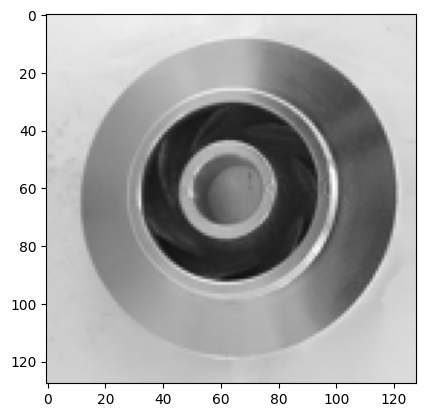

In [13]:
from PIL import Image

# Load and display the original test image
original_image = Image.open('./archive/casting_512x512/casting_512x512/ok_front/cast_ok_0_1021.jpeg')
plt.imshow(original_image)
# plt.show()

# Resize the image to the model's expected input size (128x128)
resized_image = original_image.resize((128, 128))

# Convert the resized image to a NumPy array
test_image = np.array(resized_image)

# Display the resized image
plt.imshow(test_image)
# plt.show()

# Print the shape of the resized image
print(test_image.shape)

# Model input is in the form of 4D (batch_size, row, column, channel=3 for 'rgb')
test_image = np.expand_dims(test_image, axis=0)
print(test_image.shape)

# Confidence threshold for prediction
confidence_threshold = 0.5  # You can adjust this value based on your needs

# Making a prediction
result = cnn_model.predict(test_image)
confidence = result[0][0]

print(f"Confidence: {confidence}")

if confidence >= confidence_threshold:
    if result[0][0] < 0.5:
        print('Defective')
    else:
        print('Non-defective')
else:
    print('Image rejected. Low confidence in prediction.')


In [ ]:
cnn_model.save("defect_classification_model.h5")